In [1]:
import numpy as np
import pandas as pd 

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/recipe-for-rating-predict-food-ratings-using-ml/sample.csv
/kaggle/input/recipe-for-rating-predict-food-ratings-using-ml/train.csv
/kaggle/input/recipe-for-rating-predict-food-ratings-using-ml/test.csv


# Recipe for Rating: Predict Food Ratings using ML

### The dataset is appropriately loaded and stored into corresponding variables.


In [2]:
# loading competitions data
sample_data = pd.read_csv('/kaggle/input/recipe-for-rating-predict-food-ratings-using-ml/sample.csv')
train_data = pd.read_csv('/kaggle/input/recipe-for-rating-predict-food-ratings-using-ml/train.csv')
test_data = pd.read_csv('/kaggle/input/recipe-for-rating-predict-food-ratings-using-ml/test.csv')


In [3]:
# reading sample data
sample_data.head()

,ID,Rating
0,1,5
1,2,2
2,3,4
3,4,2
4,5,4


In [4]:
# reading train data
train_data.head()

,ID,RecipeNumber,RecipeCode,RecipeName,CommentID,UserID,UserName,UserReputation,CreationTimestamp,ReplyCount,ThumbsUpCount,ThumbsDownCount,Rating,BestScore,Recipe_Review
0,70,71,12259,Banana Bars with Cream Cheese Frosting,sp_aUSaElGf_12259_c_149978,u_1oKVaBmiEKwAFyiHrDLoWpbel0J,misscoffeepot,20,1622717078,0,0,0,5,100,great recipe! I have made them just as written...
1,72,88,8202,Simple Taco Soup,sp_aUSaElGf_8202_c_310332,u_1oKZeRIXYzGNhGW8OMR3O4lX1ih,MichelleMalone,1,1622717852,0,0,1,5,100,This is an easy and quick recipe that is great...
2,458,3,2832,Cheeseburger Soup,sp_aUSaElGf_2832_c_206522,u_1oKYHUtdaD48KJCDYq5wfpAUxWz,jeannem32,1,1622717357,0,0,0,3,100,I think I was looking for something extra spec...
3,7,50,100276,Grilled Huli Huli Chicken,sp_aUSaElGf_100276_c_434088,u_1oKZCQcKQZdQhDVBS7oISc216VA,ds422,1,1622648899,0,0,0,5,100,This is our favorite grilled chicken recipe. ...
4,60,12,19731,Cauliflower Soup,sp_aUSaElGf_19731_c_387011,u_1oKd4sudZQPgu6YALiC7bW7mKMs,SusanHoward,1,1622718260,0,0,0,4,100,Great basic recipe. I added 2 teaspoons Tuscan...


In [5]:
# reading test data
test_data.head()

,ID,RecipeNumber,RecipeCode,RecipeName,CommentID,UserID,UserName,UserReputation,CreationTimestamp,ReplyCount,ThumbsUpCount,ThumbsDownCount,BestScore,Recipe_Review
0,86,45,41384,Black Bean ‘n’ Pumpkin Chili,sp_aUSaElGf_41384_c_341929,u_1oKc4U6bh65cEli8Z8eTIf98Vpr,kalloween,1,1622718043,0,0,0,100,This was so good!! The pumpkin was perfect as...
1,102,53,3143,Pumpkin Bars,sp_aUSaElGf_3143_c_274545,u_1oKW5seFLQMSwAeOfBVmwJizy5D,chocolate desert,1,1622717685,0,0,1,100,"So good! Could not stop eating them, so bad...."
2,156,53,3143,Pumpkin Bars,sp_aUSaElGf_3143_c_398512,u_1oKZ6GUIAIol8xe6oEI7t1Mpxdz,Vantreesta,1,1622718307,0,0,0,100,I use a small ladle to fill muffin cups.
3,18,89,1324,Porcupine Meatballs,sp_aUSaElGf_1324_c_431662,u_1oKWCP33NVk4Osfpu4VJuIckEF0,Roberta L.Beauchamp,1,1622648872,0,4,3,212,I made this and followed the instructions as d...
4,27,70,32264,Easy Chicken Enchiladas,sp_aUSaElGf_32264_c_423935,u_1oKVhIJMuUlrSCVkbO1jheVTol8,fhquilting,1,1622718460,0,0,1,100,Very Good! I used corn tortillas. Used fresh...


# Exploratory data analysis
---



#### ✌️<u>**Visualizing key statistics and relationships in the data**</u>



In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13636 entries, 0 to 13635
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   ID                 13636 non-null  int64 
 1   RecipeNumber       13636 non-null  int64 
 2   RecipeCode         13636 non-null  int64 
 3   RecipeName         13636 non-null  object
 4   CommentID          13636 non-null  object
 5   UserID             13636 non-null  object
 6   UserName           13636 non-null  object
 7   UserReputation     13636 non-null  int64 
 8   CreationTimestamp  13636 non-null  int64 
 9   ReplyCount         13636 non-null  int64 
 10  ThumbsUpCount      13636 non-null  int64 
 11  ThumbsDownCount    13636 non-null  int64 
 12  Rating             13636 non-null  int64 
 13  BestScore          13636 non-null  int64 
 14  Recipe_Review      13634 non-null  object
dtypes: int64(10), object(5)
memory usage: 1.6+ MB


### Data Overview

- **Total Entries:** 13,636
- **Columns:** 15

### Columns Description

1. **ID:** Unique identifier for each entry.
2. **RecipeNumber:** Placement of the recipe on the top 100 recipes list.
3. **RecipeCode:** Unique ID of the recipe used by the site.
4. **RecipeName:** Name of the recipe the comment was posted on.
5. **CommentID:** Unique ID of the comment.
6. **UserID:** Unique ID of the user who left the comment.
7. **UserName:** Name of the user.
8. **UserReputation:** Internal score of the site, roughly quantifying the past behavior of the user.
9. **CreationTimestamp:** Time at which the comment was posted as a Unix timestamp.
10. **ReplyCount:** Number of replies to the comment.
11. **ThumbsUpCount:** Number of up-votes the comment has received.
12. **ThumbsDownCount:** Number of down-votes the comment has received.
13. **Rating:** The score on a 1 to 5 scale that the user gave to the recipe. A score of 0 means that no score was given (Target Variable).
14. **BestScore:** Score of the comment, likely used by the site to help determine the order comments appear in.
15. **Recipe_Review:** Text content of the comment.

### Insights

- **Data Completeness:** All columns have 13,636 non-null entries, except for the "Recipe_Review" column, which has 13,634 non-null entries. This indicates two missing values in the "Recipe_Review" column.
- **Data Types:** Most columns contain integer values, except for "RecipeName," "CommentID," "UserID," "UserName," and "Recipe_Review," which are of type object (likely strings).
- **Target Variable:** The "Rating" column appears to be the target variable, representing the score given by users to the recipe.
- **User Interaction:** The dataset provides insights into user interactions with recipes, including ratings, comments, and engagement metrics such as reply count and thumbs-up/down count.


In [7]:
# Unique Values of the dataset
train_data.nunique()

ID                     701
RecipeNumber           100
RecipeCode             100
RecipeName             100
CommentID            13636
UserID               10783
UserName             10620
UserReputation          20
CreationTimestamp     2422
ReplyCount               4
ThumbsUpCount           57
ThumbsDownCount         51
Rating                   6
BestScore              525
Recipe_Review        13370
dtype: int64

In [8]:
train_data.describe()

,ID,RecipeNumber,RecipeCode,UserReputation,CreationTimestamp,ReplyCount,ThumbsUpCount,ThumbsDownCount,Rating,BestScore
count,13636.000000,13636.000000,13636.000000,13636.000000,1.363600e+04,13636.000000,13636.000000,13636.000000,13636.000000,13636.000000
mean,121.085289,38.624377,21785.990833,2.160311,1.623713e+09,0.014520,1.098269,0.543708,4.288721,153.127897
std,116.995633,29.672351,23883.189918,10.086424,5.444020e+06,0.137323,4.166487,3.265660,1.544839,140.986908
min,0.000000,1.000000,386.000000,0.000000,1.613035e+09,0.000000,0.000000,0.000000,0.000000,0.000000
25%,45.000000,12.000000,6504.000000,1.000000,1.622717e+09,0.000000,0.000000,0.000000,5.000000,100.000000
50%,91.000000,33.000000,14600.000000,1.000000,1.622718e+09,0.000000,0.000000,0.000000,5.000000,100.000000
75%,148.000000,63.000000,33121.000000,1.000000,1.622718e+09,0.000000,0.000000,0.000000,5.000000,100.000000
max,724.000000,100.000000,191775.000000,510.000000,1.665756e+09,3.000000,80.000000,126.000000,5.000000,946.000000


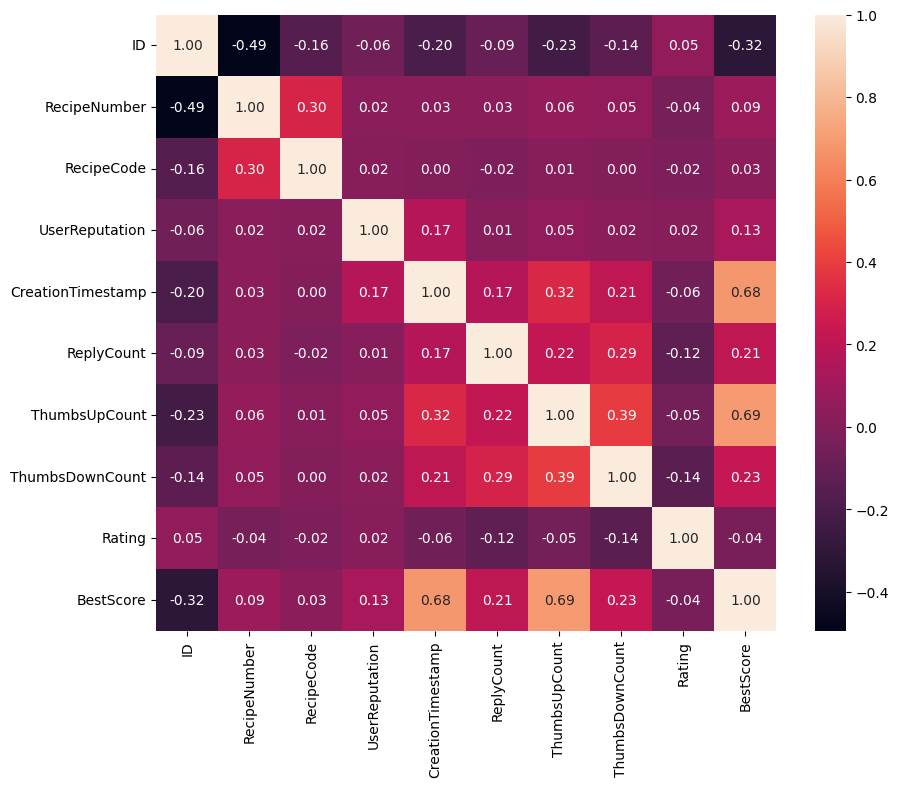

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(train_data.select_dtypes(exclude=['object']).corr(), annot=True, fmt='.2f') 

plt.show()

### * No correlation was found among the features initially.
### * However, in later stages, a correlation was discovered between the review feature.


array([[<Axes: title={'center': 'ID'}>,
        <Axes: title={'center': 'RecipeNumber'}>,
        <Axes: title={'center': 'RecipeCode'}>],
       [<Axes: title={'center': 'UserReputation'}>,
        <Axes: title={'center': 'CreationTimestamp'}>,
        <Axes: title={'center': 'ReplyCount'}>],
       [<Axes: title={'center': 'ThumbsUpCount'}>,
        <Axes: title={'center': 'ThumbsDownCount'}>,
        <Axes: title={'center': 'Rating'}>],
       [<Axes: title={'center': 'BestScore'}>, <Axes: >, <Axes: >]],
      dtype=object)

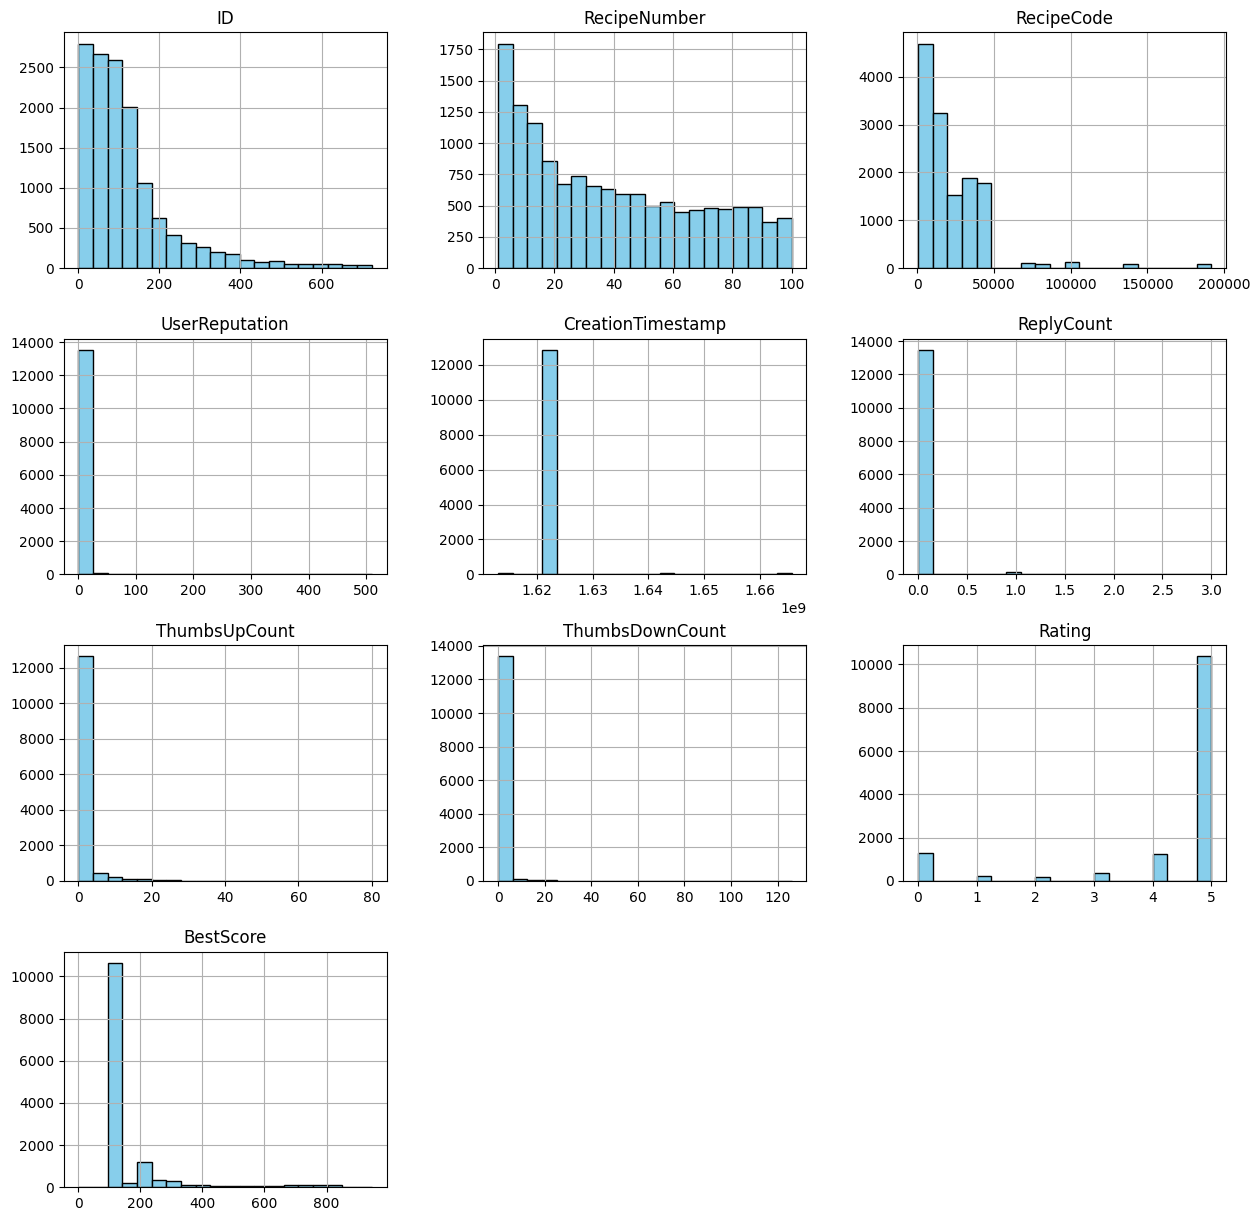

In [10]:
train_data.hist(bins=20, figsize=(15, 15), color='skyblue', edgecolor='black', grid=True, sharex=False, sharey=False)


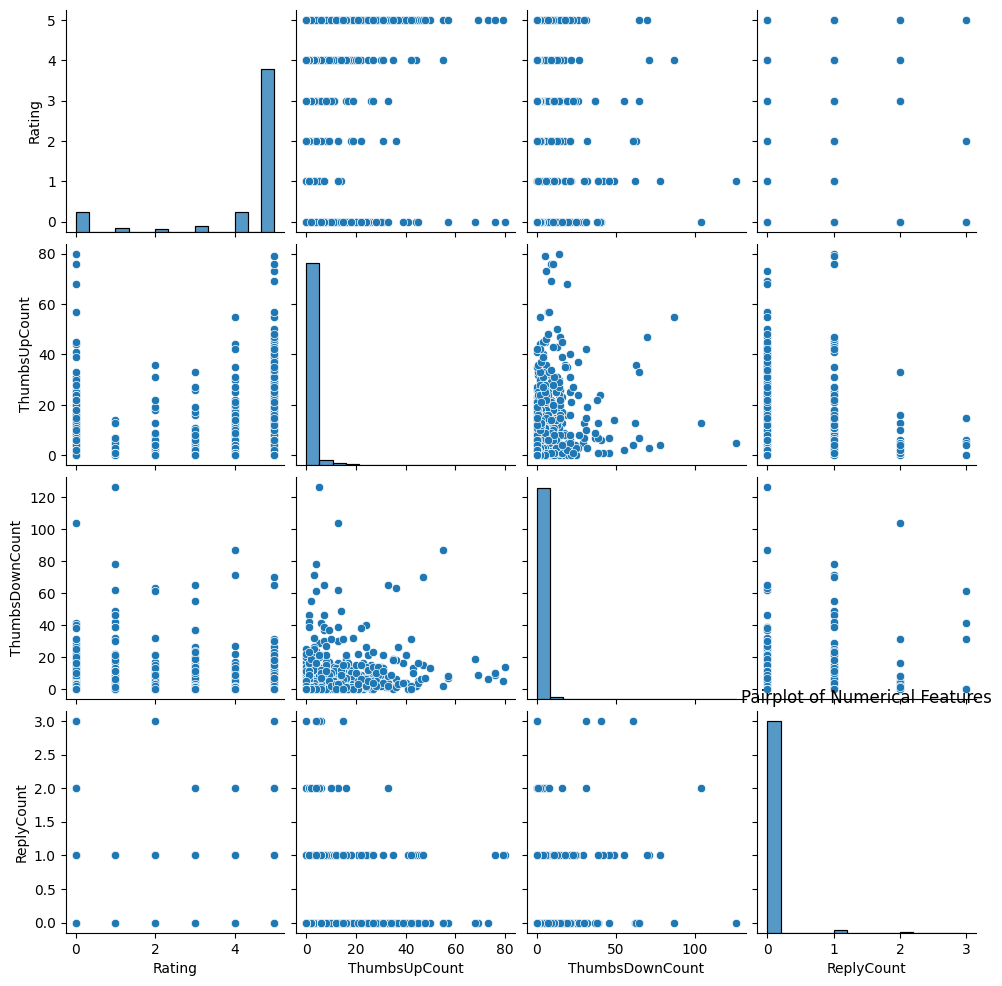

In [11]:
sns.pairplot(train_data[['Rating', 'ThumbsUpCount', 'ThumbsDownCount', 'ReplyCount']])
plt.title('Pairplot of Numerical Features')
plt.show()


#### **✌️ <u>Correctly identify the feature types.**</u>


In [12]:
# checking categorical columns
categorical_columns = train_data.select_dtypes(include=['object'])
categorical_columns

,RecipeName,CommentID,UserID,UserName,Recipe_Review
0,Banana Bars with Cream Cheese Frosting,sp_aUSaElGf_12259_c_149978,u_1oKVaBmiEKwAFyiHrDLoWpbel0J,misscoffeepot,great recipe! I have made them just as written...
1,Simple Taco Soup,sp_aUSaElGf_8202_c_310332,u_1oKZeRIXYzGNhGW8OMR3O4lX1ih,MichelleMalone,This is an easy and quick recipe that is great...
2,Cheeseburger Soup,sp_aUSaElGf_2832_c_206522,u_1oKYHUtdaD48KJCDYq5wfpAUxWz,jeannem32,I think I was looking for something extra spec...
3,Grilled Huli Huli Chicken,sp_aUSaElGf_100276_c_434088,u_1oKZCQcKQZdQhDVBS7oISc216VA,ds422,This is our favorite grilled chicken recipe. ...
4,Cauliflower Soup,sp_aUSaElGf_19731_c_387011,u_1oKd4sudZQPgu6YALiC7bW7mKMs,SusanHoward,Great basic recipe. I added 2 teaspoons Tuscan...
...,...,...,...,...,...
13631,Quick Cream of Mushroom Soup,sp_aUSaElGf_11767_c_127710,u_1oKVbHjirkAIWwTjbt9dWyqENo2,elbay,Delicious!! Very easy to make! One minor chang...
13632,Favorite Chicken Potpie,sp_aUSaElGf_21444_c_196030,u_1oKXoBnyJ2ocquNYwAhs19LMSrA,PauletteInhofe,I made this pie for my family and they loved i...
13633,Taco Lasagna,sp_aUSaElGf_20170_c_359338,u_1oKbGr5o9tj0mQl1rkVqzWnE481,Barbaralarkin,Very tasty!
13634,Chicken and Dumplings,sp_aUSaElGf_24886_c_175514,u_1oKWD7Dqjmc0oYHdW8Vm3fzhxJW,SammyPrissy,I have made this numerous times. It&#39;s so ...


## Feature Description:

- RecipeName: Name of the recipe the comment was posted on
- CommentID: Unique ID of the comment
- UserID: Unique ID of the user who left the comment
- UserName: Name of the user
- Recipe_Review: Text content of the comment

In [13]:
# checking numerical columns
numerical_columns = train_data.select_dtypes(exclude=['object'])
numerical_columns

,ID,RecipeNumber,RecipeCode,UserReputation,CreationTimestamp,ReplyCount,ThumbsUpCount,ThumbsDownCount,Rating,BestScore
0,70,71,12259,20,1622717078,0,0,0,5,100
1,72,88,8202,1,1622717852,0,0,1,5,100
2,458,3,2832,1,1622717357,0,0,0,3,100
3,7,50,100276,1,1622648899,0,0,0,5,100
4,60,12,19731,1,1622718260,0,0,0,4,100
...,...,...,...,...,...,...,...,...,...,...
13631,115,98,11767,1,1622716969,0,0,0,5,100
13632,372,6,21444,1,1622717329,0,0,0,5,100
13633,87,37,20170,1,1622718089,0,0,0,5,100
13634,48,63,24886,1,1622717192,0,0,0,5,100


In [14]:
# Comparing RecipeNumber, RecipeCode and RecipeName values.
total_RecipeNumber = train_data['RecipeNumber'].nunique()
total_RecipeCode = train_data['RecipeCode'].nunique()
total_RecipeName = train_data['RecipeName'].nunique()

print('Unique Recipe numbers are ',total_RecipeNumber)
print('Unique Recipe code are ',total_RecipeCode)
print('Unique Recipe numbers are ',total_RecipeNumber)

Unique Recipe numbers are  100
Unique Recipe code are  100
Unique Recipe numbers are  100


In [15]:
train_data[train_data['RecipeNumber']== 71].head()

,ID,RecipeNumber,RecipeCode,RecipeName,CommentID,UserID,UserName,UserReputation,CreationTimestamp,ReplyCount,ThumbsUpCount,ThumbsDownCount,Rating,BestScore,Recipe_Review
0,70,71,12259,Banana Bars with Cream Cheese Frosting,sp_aUSaElGf_12259_c_149978,u_1oKVaBmiEKwAFyiHrDLoWpbel0J,misscoffeepot,20,1622717078,0,0,0,5,100,great recipe! I have made them just as written...
172,4,71,12259,Banana Bars with Cream Cheese Frosting,sp_aUSaElGf_12259_c_432323,u_1tOHuoHsIKxNgRRS2s1MxNt9jg6,GoldApple,0,1622648873,0,2,2,5,167,Just made these banana bars for Easter. They w...
617,124,71,12259,Banana Bars with Cream Cheese Frosting,sp_aUSaElGf_12259_c_318162,u_1oKVvQbJjVuvKHTFaOOplRwvy5F,jillgingras,1,1622717934,0,0,0,0,100,This is the best banana bar recipe. It is a fa...
720,37,71,12259,Banana Bars with Cream Cheese Frosting,sp_aUSaElGf_12259_c_292137,u_1oKVZkwou43a0PL7Aw0NCrDXTLL,Debglass11,30,1622717807,0,0,0,5,100,These are wonderful! Made exactly as written....
796,73,71,12259,Banana Bars with Cream Cheese Frosting,sp_aUSaElGf_12259_c_373766,u_1oKVeUN8Xkh7FxowgzAvZdnEl7Y,oeg1kallee,1,1622718153,0,0,0,5,100,wow- I have a new go-to recipe for my ripe ban...


### <u> **Recipe Analysis** </u>


In the dataset, there's a noticeable redundancy in the columns for recipe identification: `RecipeNumber`, `RecipeCode`, and `RecipeName`. Let's take an example:

| RecipeNumber | RecipeCode | RecipeName                     |
|--------------|------------|--------------------------------|
| 71           | 12259      | Banana Bars with Cream Cheese Frosting |

<span style="font-size: larger;">
Upon inspection, it's evident that the values across these columns are identical. This redundancy can be addressed during preprocessing to enhance the efficiency and cleanliness of the dataset.
</span>

# Detecting missing data and imputation, if required.


In [16]:
# Check for missing values in the entire dataset

missing_values = train_data.isnull()
print(missing_values.sum())

ID                   0
RecipeNumber         0
RecipeCode           0
RecipeName           0
CommentID            0
UserID               0
UserName             0
UserReputation       0
CreationTimestamp    0
ReplyCount           0
ThumbsUpCount        0
ThumbsDownCount      0
Rating               0
BestScore            0
Recipe_Review        2
dtype: int64


## There are two Values missing in the Recipe_Review column.


In [17]:
# Samples with missing values with respect to Recipe_Review
samples_with_missing_values = train_data[missing_values['Recipe_Review']]

samples_with_missing_values

,ID,RecipeNumber,RecipeCode,RecipeName,CommentID,UserID,UserName,UserReputation,CreationTimestamp,ReplyCount,ThumbsUpCount,ThumbsDownCount,Rating,BestScore,Recipe_Review
2984,299,6,21444,Favorite Chicken Potpie,sp_aUSaElGf_21444_c_260817,u_1oKXz42APTrXTFF6SGvR3YMBJGy,TRGriggs,1,1622717652,0,0,0,5,100,NaN
11654,344,3,2832,Cheeseburger Soup,sp_aUSaElGf_2832_c_260955,u_1oKZmfyycO3xVnQeffIKHuaKT2U,No.1FamilyBaker,1,1622717645,0,0,0,5,100,NaN


---
#### There are two `Recipe_Review` values missing
#### It is very clear from Review was great because of the Rating is 5, then we can impute the value with 'Great Food'.

### Imputing Missing Values

In [18]:
train_data.loc[[2984,11654],'Recipe_Review'] = 'Very tasty!'

In [19]:
# checking for missing values in Test Data Set.
test_data.isnull().sum()

ID                   0
RecipeNumber         0
RecipeCode           0
RecipeName           0
CommentID            0
UserID               0
UserName             0
UserReputation       0
CreationTimestamp    0
ReplyCount           0
ThumbsUpCount        0
ThumbsDownCount      0
BestScore            0
Recipe_Review        0
dtype: int64

#### Splitting Data 

In [20]:
X_train = train_data.drop('Rating', axis=1)
y_train = train_data['Rating']

X_test = test_data.copy()

# The dataset is appropriately preprocessed,


#### ✌️ scaling numerical features and encoding categorical features.


### Appropriate usage of pipelines if any.


In [21]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer


# Preprocessing for numerical data with column name User_Reputation, BestScore
numeric_transformer = Pipeline(steps=[
    ('scaler', MinMaxScaler())
])

# Preprocessing for categorical data with column name RecipeNumber
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(sparse_output=False))
])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, ['UserReputation', 'BestScore']),
        ('cat', categorical_transformer, ['RecipeNumber'])
    ],
    remainder='passthrough', 
    verbose_feature_names_out=False
).set_output(transform='pandas')


In [22]:
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

In [23]:
X_train.head(1)

,UserReputation,BestScore,RecipeNumber_1,RecipeNumber_2,RecipeNumber_3,RecipeNumber_4,RecipeNumber_5,RecipeNumber_6,RecipeNumber_7,RecipeNumber_8,...,RecipeCode,RecipeName,CommentID,UserID,UserName,CreationTimestamp,ReplyCount,ThumbsUpCount,ThumbsDownCount,Recipe_Review
0,0.039216,0.105708,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,12259,Banana Bars with Cream Cheese Frosting,sp_aUSaElGf_12259_c_149978,u_1oKVaBmiEKwAFyiHrDLoWpbel0J,misscoffeepot,1622717078,0,0,0,great recipe! I have made them just as written...


# Feature engineering/extraction.


### Dropping Redudent Columns with `RecipeNumber`, `RecipeCode`, and `RecipeName`

In [24]:
X_train.drop(['RecipeCode','RecipeName'], axis=1, inplace=True)
X_test.drop(['RecipeCode','RecipeName'], axis=1, inplace=True)

### Converting timestamp to Greeting of the day i.e (Morning, Evening, Afternoon, Night) and Weekend that store True/False.

In [25]:
X_train['CreationTimestamp'] = pd.to_datetime(X_train['CreationTimestamp'])
X_test['CreationTimestamp'] = pd.to_datetime(X_test['CreationTimestamp'])

def greeting_of_day(x):    
    if x.hour < 12:
        #morning
        return 1
    elif 12 <= x.hour < 17:
        #afternoon
        return 2
    elif 17 <= x.hour < 20:
        #evening
        return 3
    else:
        #night
        return 4
    
def is_weekend(x):
    if x.weekday() in [5,6]:
        return 1
    else:
        return 0    

X_train['Greeting_of_day'] = X_train['CreationTimestamp'].apply(greeting_of_day)
X_train['Is_weekend'] = X_train['CreationTimestamp'].apply(is_weekend)

X_test['Greeting_of_day'] = X_test['CreationTimestamp'].apply(greeting_of_day)
X_test['Is_weekend'] = X_test['CreationTimestamp'].apply(is_weekend)

X_train.drop('CreationTimestamp', axis=1, inplace=True)
X_test.drop('CreationTimestamp', axis=1, inplace=True)

### Applying PCA

In [26]:
from sklearn.decomposition import PCA

pca = PCA(n_components=108)

#apply PCA to train data 
X_train_pca = pca.fit_transform(X_train.select_dtypes(exclude=['object']))

# apply PCA to test data 
X_test_pca = pca.transform(X_test.select_dtypes(exclude=['object']))


X_train_pca = pd.DataFrame(X_train_pca)
X_test_pca = pd.DataFrame(X_test_pca)

### Vectorizing Review column using TfID



In [27]:
# vectorizing Recipe_Review
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(lowercase=True, analyzer='word', stop_words= 'english')
testing = tfidf.fit_transform(X_train['Recipe_Review'])
testing_test = tfidf.transform(X_test['Recipe_Review'])

- `lowercase=True`: This parameter ensures that all words are converted to lowercase before vectorization. It helps in avoiding duplication of words due to case differences, ensuring consistency in the representation of words.

- `analyzer='word'`: This parameter specifies that the analyzer will treat each word as a token for vectorization. In this mode, the input is expected to be a sequence of strings or bytes, and the built-in tokenizer splits the input text into words based on white spaces. Other options include `'char'` for character n-grams, which treats each character as a separate token.

- `stop_words='english'`: This parameter removes common English stop words (e.g., "the", "is", "in") during vectorization. Stop words are frequently occurring words in a language that usually do not carry significant meaning and may introduce noise in the analysis. By specifying `'english'`, the vectorizer utilizes a predefined list of English stop words provided by scikit-learn, helping to improve the quality of the TF-IDF representation by filtering out these common words.


In [28]:
# merging the vectorized data with the original data
X_train = pd.concat([X_train, pd.DataFrame(testing.toarray(), columns=tfidf.get_feature_names_out())], axis=1)
X_test = pd.concat([X_test, pd.DataFrame(testing_test.toarray(), columns=tfidf.get_feature_names_out())], axis=1)

# dropping Recipe_Review column
X_train.drop('Recipe_Review', axis=1, inplace=True)
X_test.drop('Recipe_Review', axis=1, inplace=True)

## Checking for the remaining Categorical Features:

In [29]:
X_test.select_dtypes(include=['object'])

,CommentID,UserID,UserName
0,sp_aUSaElGf_41384_c_341929,u_1oKc4U6bh65cEli8Z8eTIf98Vpr,kalloween
1,sp_aUSaElGf_3143_c_274545,u_1oKW5seFLQMSwAeOfBVmwJizy5D,chocolate desert
2,sp_aUSaElGf_3143_c_398512,u_1oKZ6GUIAIol8xe6oEI7t1Mpxdz,Vantreesta
3,sp_aUSaElGf_1324_c_431662,u_1oKWCP33NVk4Osfpu4VJuIckEF0,Roberta L.Beauchamp
4,sp_aUSaElGf_32264_c_423935,u_1oKVhIJMuUlrSCVkbO1jheVTol8,fhquilting
...,...,...,...
4541,sp_aUSaElGf_17310_c_310012,u_1oKYP0QIv00q3K9Z5U0TosT5gYx,jsantullo
4542,sp_aUSaElGf_26937_c_331905,u_1oKVlhuSfIH4M8gwWLvmkvs3215,homeoftaste
4543,sp_aUSaElGf_41095_c_112060,u_1oKVb3oC9QR5uDI8OqeaPncMtBe,cmfisher
4544,sp_aUSaElGf_19731_c_391682,u_1oKcs7T7xAY63ZrRKCwH8ccshww,danalu8


### Dropping `CommentID`, `UserID` and `UserName` columns

In [30]:
#Dropping `CommentID`, `UserID` and `UserName` columns
X_train.drop(['CommentID', 'UserID', 'UserName'], axis=1, inplace=True)
X_test.drop(['CommentID', 'UserID', 'UserName'], axis=1, inplace=True)

# Hyperparameter tuning of the model to optimize its performance.


## Code Snippet
![](https://i.imgur.com/8u7PaSy.png)


In [31]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_score

# Initialize models
models = {
    "Random Forest": RandomForestClassifier(),
    "XGBoost": XGBClassifier(),
    "LightGBM": LGBMClassifier(),
    "Multinomial Naive Bayes": MultinomialNB(),
    "SGD Classifier": SGDClassifier()
}

# Dictionary to store mean accuracy scores
accuracy_scores = {}

# Run all the models
for model_name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=2, scoring='accuracy', n_jobs=-1)
    accuracy_scores[model_name] = scores.mean()

# Print results
for model_name, score in accuracy_scores.items():
    print(f'{model_name} - Mean Accuracy: {score}')
    print('-----------------------------------')


Random Forest - Mean Accuracy: 0.7697271927251393
-----------------------------------
XGBoost - Mean Accuracy: 0.7733939571721913
-----------------------------------
LightGBM - Mean Accuracy: 0.778527427398064
-----------------------------------
Multinomial Naive Bayes - Mean Accuracy: 0.7104722792607803
-----------------------------------
SGD Classifier - Mean Accuracy: 0.45174537987679675
-----------------------------------


## Summary of Model Performance

After evaluating several machine learning models on our dataset, we have identified the top performers based on their accuracy scores:

1. **LightGBM Classifier (LGBMClassifier):**  
   - Accuracy: 0.7860

2. **XGBoost Classifier (XGBClassifier):**  
   - Accuracy: 0.7799

3. **Random Forest Classifier (RandomForestClassifier):**  
   - Accuracy: 0.7742

These three models have demonstrated the highest accuracy among the ones tested. We will further explore and fine-tune these models to select the best one for our specific use case.


In [32]:
# Randomize Search CV   
from sklearn.model_selection import RandomizedSearchCV

#best_params
params =  {'n_estimators': [500],
          'max_depth': [40],
          'min_samples_split': [2],
          'min_samples_leaf': [4],
          'bootstrap': [False]
         }

# hyperparameters for RandomForestClassifier
# params = {'n_estimators': [100, 200, 300, 400, 500],
#           'max_depth': [10, 20, 30, 40, 50],
#           'min_samples_split': [2, 5, 10],
#           'min_samples_leaf': [1, 2, 4],
#           'bootstrap': [True, False]
#          }
rf = RandomForestClassifier()
rf_random = RandomizedSearchCV(estimator=rf, param_distributions=params, n_iter=10, cv=2, verbose=2, random_state=42, n_jobs=-1)
rf_random.fit(X_train, y_train)

# best parameters
rf_random.best_params_ 

rf = RandomForestClassifier(**rf_random.best_params_)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

#Score 
rf.score(X_train, y_train)

Fitting 2 folds for each of 1 candidates, totalling 2 fits


/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


0.7605602816075095

In [33]:
from sklearn.metrics import classification_report

# Generate classification report
class_report = classification_report(y_train, rf.predict(X_train))
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1272
           1       0.00      0.00      0.00       210
           2       0.00      0.00      0.00       174
           3       0.00      0.00      0.00       368
           4       0.00      0.00      0.00      1241
           5       0.76      1.00      0.86     10371

    accuracy                           0.76     13636
   macro avg       0.13      0.17      0.14     13636
weighted avg       0.58      0.76      0.66     13636



/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [34]:
# Submission by passing id and rating
submission = pd.DataFrame({'ID': np.arange(1,4547), 'Rating': rf_pred})
submission.to_csv('submission_rf.csv', index=False)

### XGBClassifier

In [35]:
from sklearn.model_selection import RandomizedSearchCV


# parameter for XGBClassifier
params = {'n_estimators': [400],
          'max_depth': [20],
          'learning_rate': [0.05],
#           'subsample': [0.7],
#           'colsample_bytree': [0.7],
#           'colsample_bylevel': [1.0],
#           'colsample_bynode': [0.5]
          }
# parameter for XGBClassifier
# params = {'n_estimators': [100, 200, 300, 400, 500],
#           'max_depth': [10, 20, 30, 40, 50],
#           'learning_rate': [0.01, 0.05, 0.1, 0.3, 0.5],
#           'subsample': [0.5, 0.7, 1.0],
#           'colsample_bytree': [0.5, 0.7, 1.0],
#           'colsample_bylevel': [0.5, 0.7, 1.0],
#           'colsample_bynode': [0.5, 0.7, 1.0]
#           }

xgb = XGBClassifier()

xgb_random = RandomizedSearchCV(estimator=xgb, param_distributions=params, n_iter=10, cv=2, verbose=2, random_state=42, n_jobs=-1)
xgb_random.fit(X_train, y_train)


# best parameters
xgb_random.best_params_

xgb = XGBClassifier(**xgb_random.best_params_)
xgb.fit(X_train, y_train)
xgb_pred = xgb.predict(X_test)

#Score
xgb.score(X_train, y_train)

Fitting 2 folds for each of 1 candidates, totalling 2 fits


/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


[CV] END bootstrap=False, max_depth=40, min_samples_leaf=4, min_samples_split=2, n_estimators=500; total time=  53.7s
[CV] END .learning_rate=0.05, max_depth=20, n_estimators=400; total time=24.1min
[CV] END bootstrap=False, max_depth=40, min_samples_leaf=4, min_samples_split=2, n_estimators=500; total time=  53.3s
[CV] END .learning_rate=0.05, max_depth=20, n_estimators=400; total time=24.2min


0.9829128776767381

In [36]:
from sklearn.metrics import classification_report

# Generate classification report
class_report = classification_report(y_train, xgb.predict(X_train))
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.93      0.96      1272
           1       1.00      1.00      1.00       210
           2       1.00      0.99      1.00       174
           3       1.00      0.96      0.98       368
           4       1.00      0.90      0.95      1241
           5       0.98      1.00      0.99     10371

    accuracy                           0.98     13636
   macro avg       1.00      0.96      0.98     13636
weighted avg       0.98      0.98      0.98     13636



In [37]:
# Submission by passing id and rating 
submission = pd.DataFrame({'ID': np.arange(1,4547), 'Rating': xgb_pred})
submission.to_csv('submission_xgb.csv', index=False)



### LGBMClassifier

In [38]:
# parameter for LGBMClassifier
params = {
    'n_estimators': [301],
    'max_depth': [14],
    'learning_rate': [0.1142],
#     'num_leaves': [20],
#     'subsample': [0.66],
#     'colsample_bytree': [0.69],
#     'reg_alpha': [0.95],
#     'reg_lambda': [0.01],
#     'min_child_samples': [7]

}
lgbm = LGBMClassifier()

lgbm_random = RandomizedSearchCV(estimator=lgbm, param_distributions=params, n_iter=12, cv=2, verbose=2, random_state=42, n_jobs=-1)
lgbm_random.fit(X_train, y_train)

# best parameters
lgbm_random.best_params_

lgbm = LGBMClassifier(**lgbm_random.best_params_)
lgbm.fit(X_train, y_train)
lgbm_pred = lgbm.predict(X_test)

#Score
lgbm.score(X_train, y_train)

Fitting 2 folds for each of 1 candidates, totalling 2 fits


/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 1 is smaller than n_iter=12. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


0.9823261953652097

In [39]:
from sklearn.metrics import classification_report

# Generate classification report
class_report = classification_report(y_train, lgbm.predict(X_train))
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.92      0.96      1272
           1       1.00      1.00      1.00       210
           2       1.00      1.00      1.00       174
           3       1.00      1.00      1.00       368
           4       1.00      0.89      0.94      1241
           5       0.98      1.00      0.99     10371

    accuracy                           0.98     13636
   macro avg       0.99      0.97      0.98     13636
weighted avg       0.98      0.98      0.98     13636



In [40]:
# Submission by passing id and rating
submission = pd.DataFrame({'ID': np.arange(1,4547), 'Rating': lgbm_pred})
submission.to_csv('submission_lgbm.csv', index=False)